## Understanding Your Data Part 1

### 1. What Questions should you ask to Your Data ??

In [1]:
import pandas as pd
import numpy as np

## Load the Data


In [2]:
df = pd.read_csv("train.csv")

### How big is the Data ?

In [3]:
df.shape

(891, 12)

## How does the Data Look ?

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Better

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.00,1,0,113773,53.1000,D30,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.00,4,2,347077,31.3875,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
419,420,0,3,"Van Impe, Miss. Catharina",female,10.00,0,2,345773,24.1500,NaN,S


## How are the data types of the Columns ??


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Are there any missing values in the Data ??

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## How does the Data Look Mathematically  ??

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Are there any duplicates

In [10]:
df.duplicated().sum()

0

## Correlations between Columns ??

In [11]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(non_numeric_cols, axis=1)
correlation_matrix = df_numeric.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## EDA - Univariate Analysis

1. Categorical Data


# a. Countplot

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv("train.csv")

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='count', ylabel='Sex'>

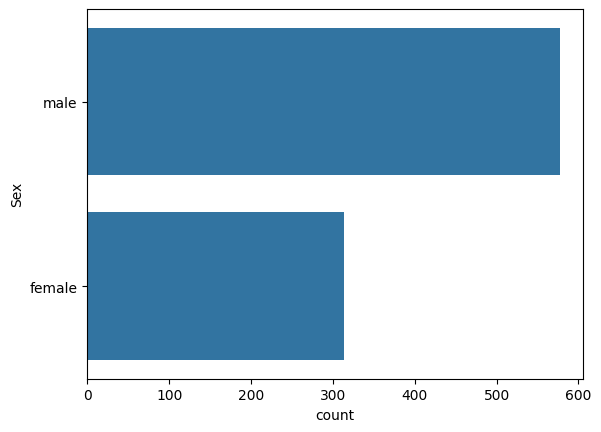

In [15]:
sns.countplot(df['Sex'])

In [16]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

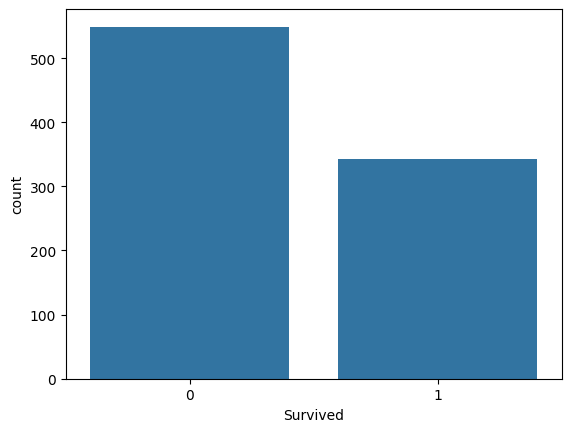

In [17]:
sns.countplot(x=df['Survived'])

<Axes: xlabel='Survived'>

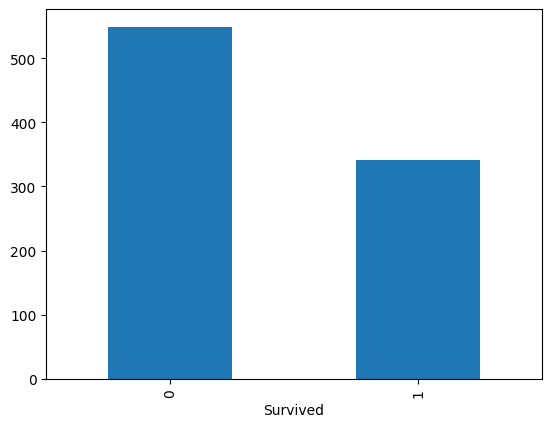

In [18]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass', ylabel='count'>

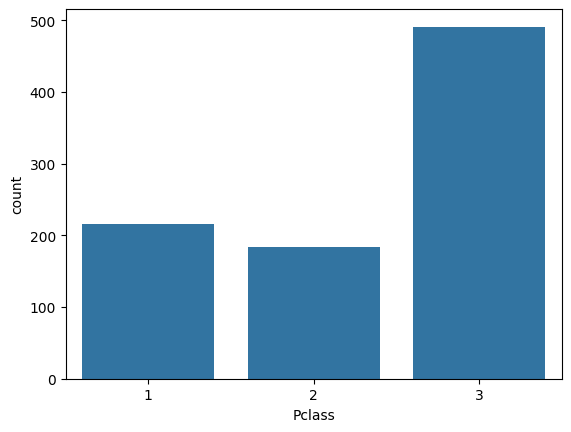

In [19]:
sns.countplot(x=df['Pclass'])

<ipython-input-20-f348f5dd1fd4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Embarked'],palette=['green','blue','red'])


<Axes: xlabel='Embarked', ylabel='count'>

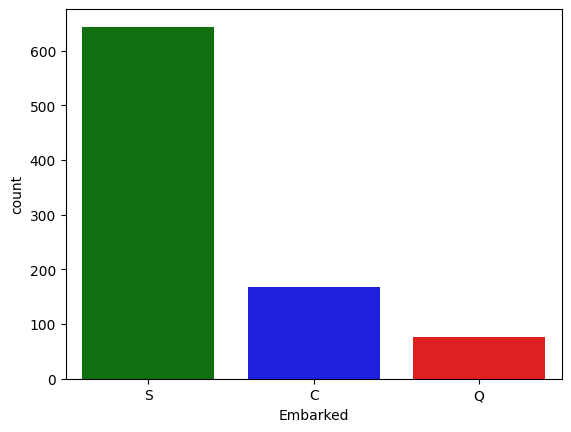

In [20]:
sns.countplot(x=df['Embarked'],palette=['green','blue','red'])

## B. PieChart

<Axes: ylabel='count'>

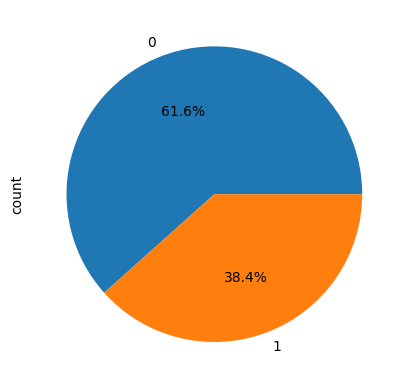

In [21]:
df['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

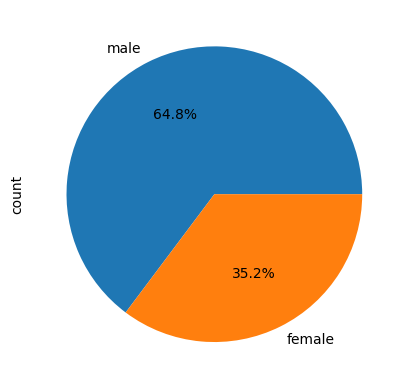

In [22]:
df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

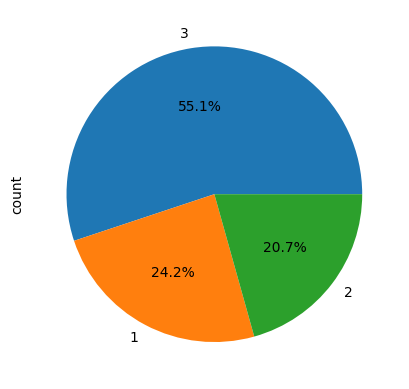

In [23]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## 2. Numerical Data


### a. Histogram

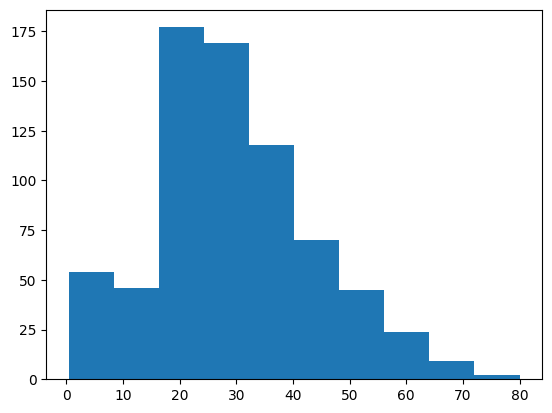

In [24]:
plt.hist(df['Age'],bins=10)
plt.show()

## b. Distplot

## Probability density function


<ipython-input-25-29923ba59938>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


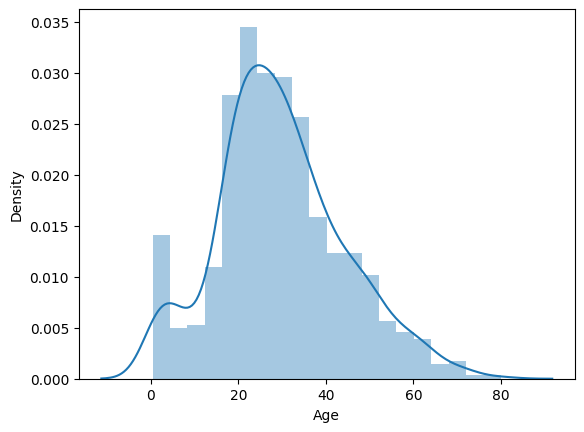

In [25]:
sns.distplot(df['Age'])
plt.show()

## C. BoxPlot

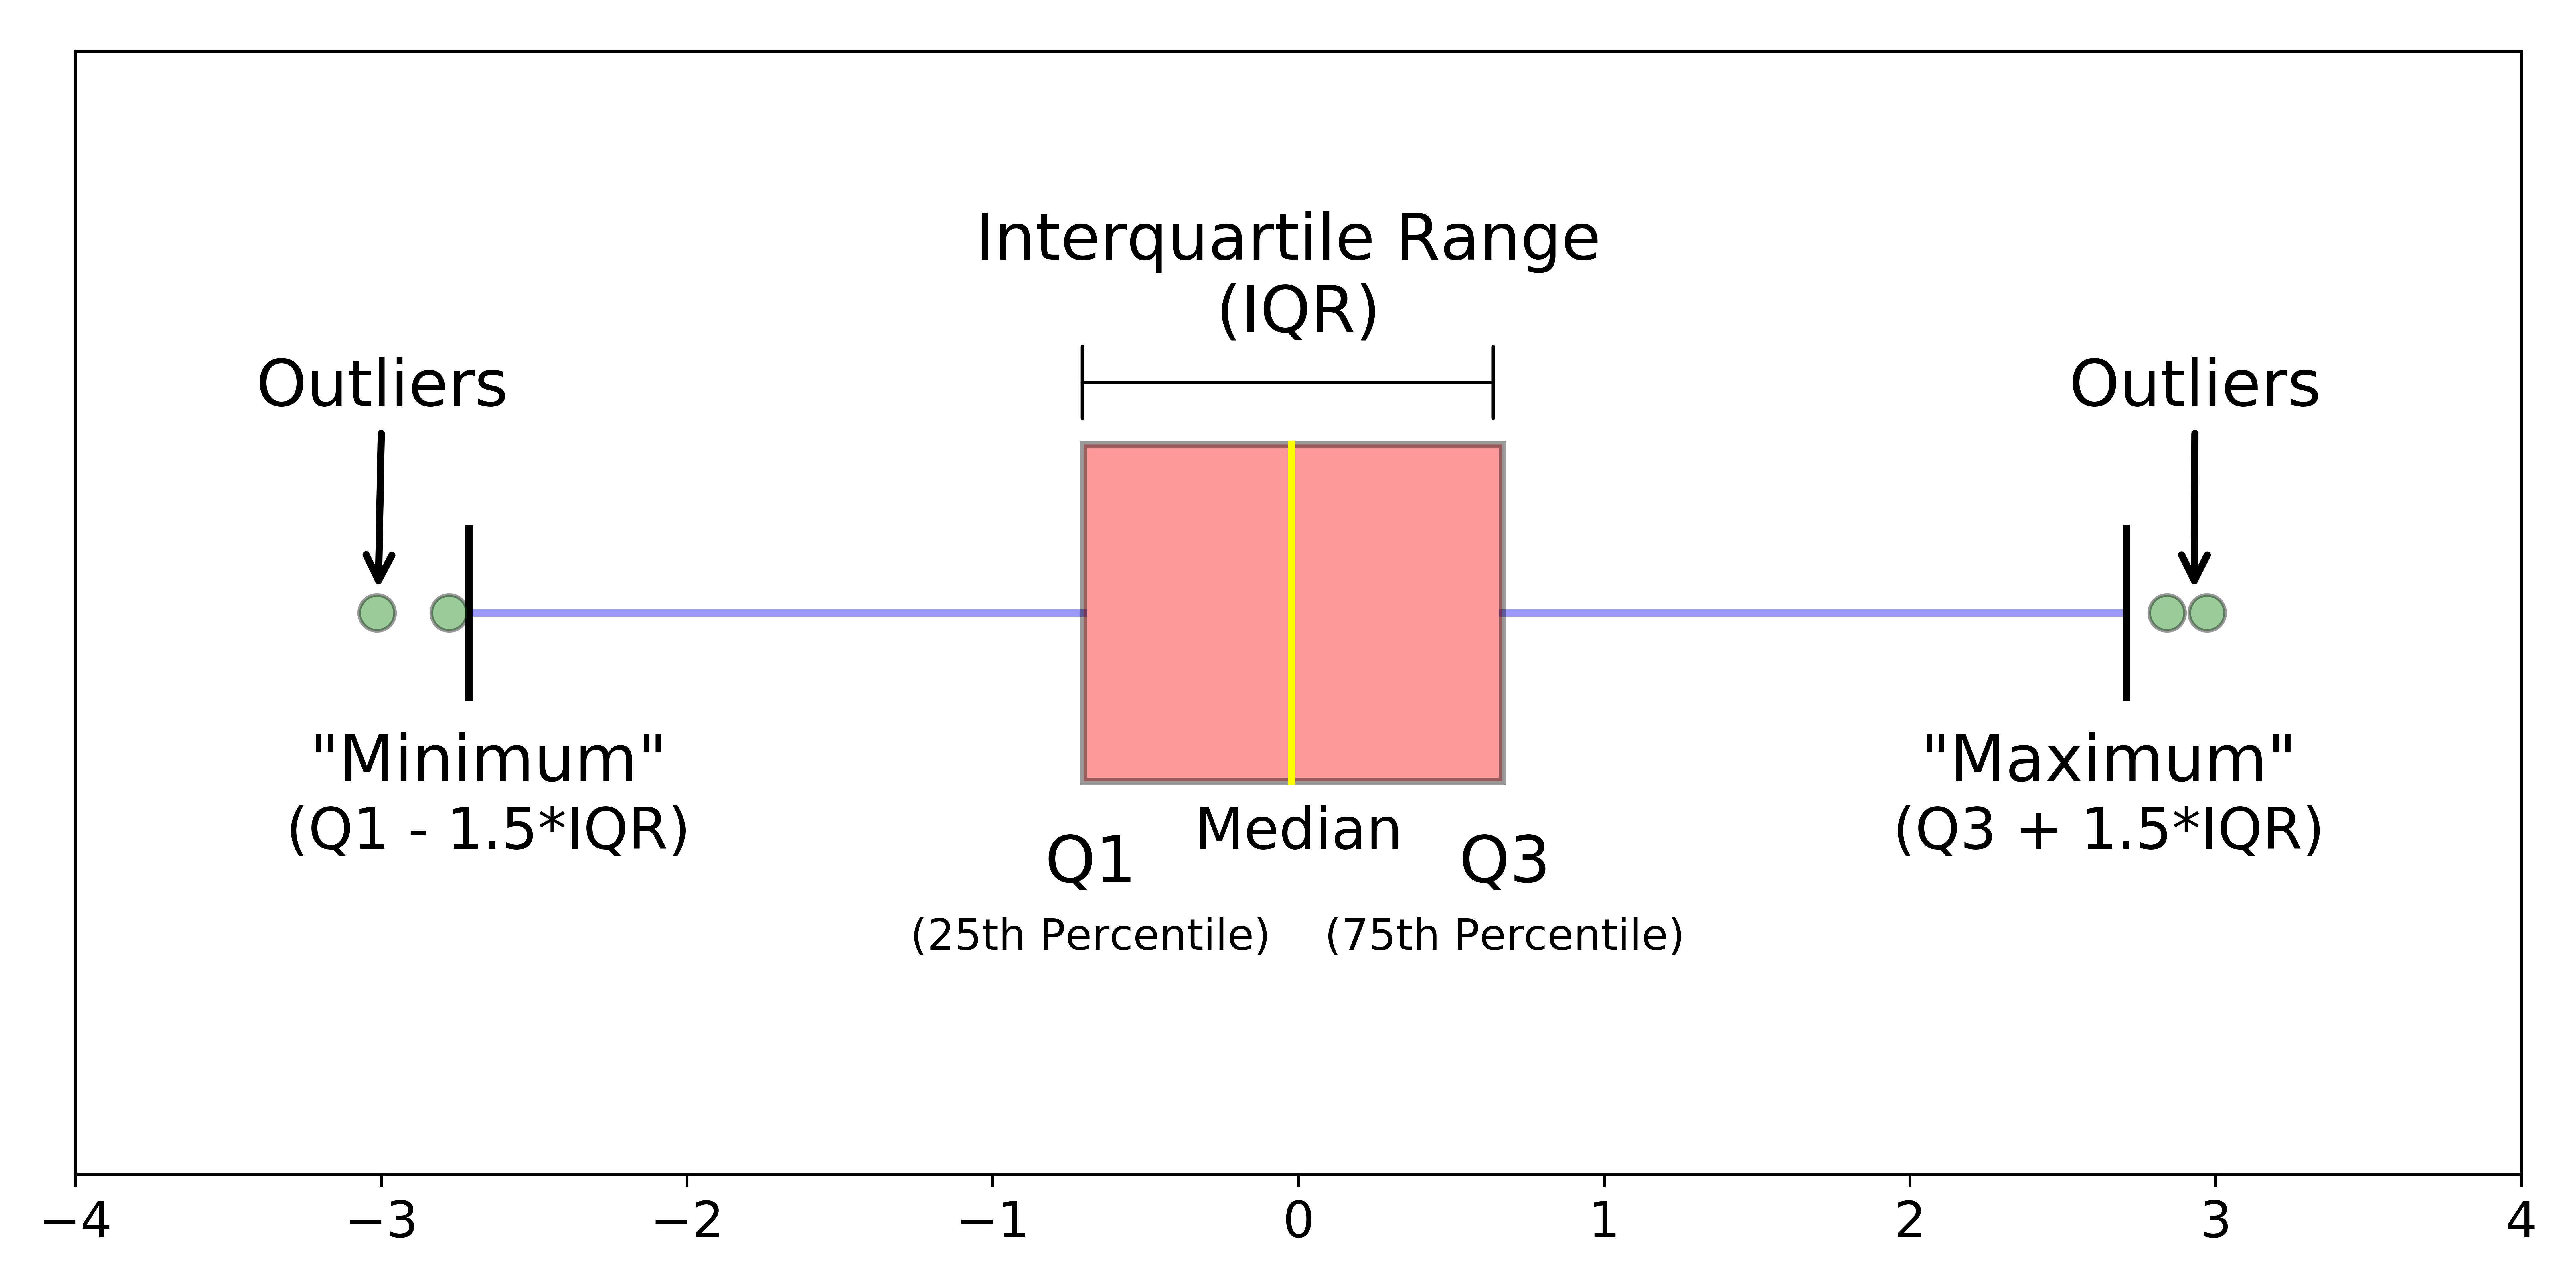




<Axes: xlabel='Fare'>

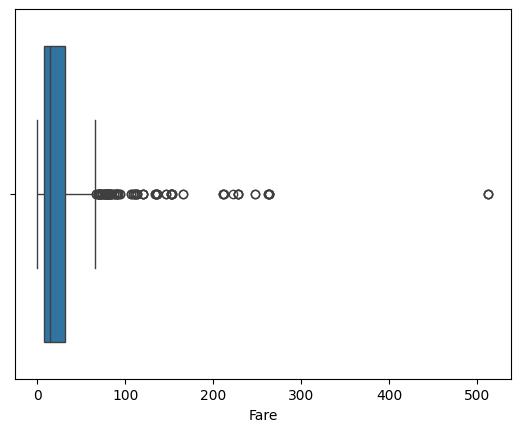

In [26]:
sns.boxplot(x=df['Fare'])

<Axes: ylabel='Age'>

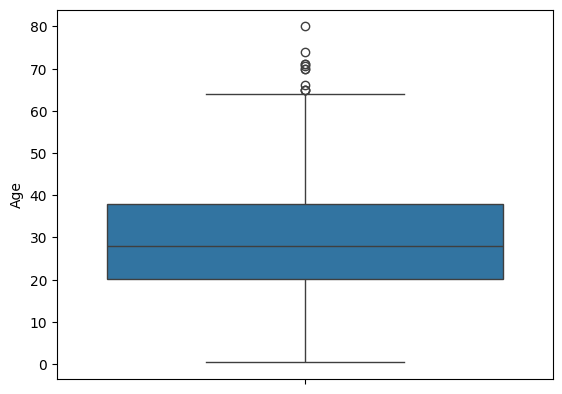

In [27]:
sns.boxplot(df['Age'])

In [28]:
df['Age'].min()

0.42

In [29]:
df['Age'].max()

80.0

In [30]:
df['Age'].skew()

0.38910778230082704

# Multivariate Analysis

In [32]:
tips = sns.load_dataset('tips')

In [33]:
titanic = pd.read_csv("train.csv")

In [34]:
flights = sns.load_dataset("flights")

In [35]:
iris = sns.load_dataset("iris")

## Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

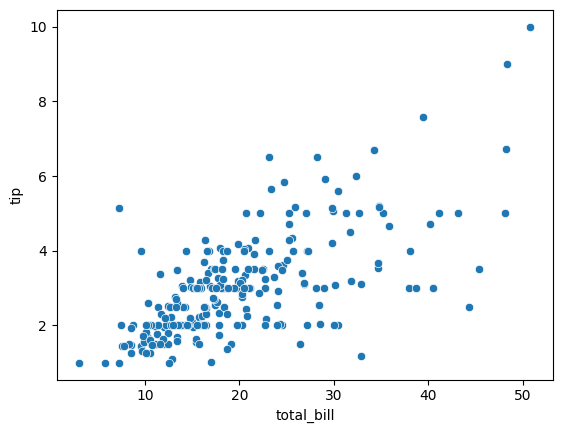

In [37]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'])

## Multivariate Analysis


5 things in a single scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

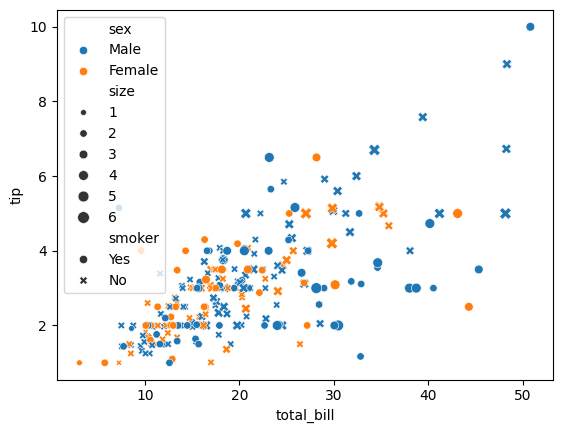

In [41]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size'])

## 2 Barplot (Numerical - Categorical)

<Axes: xlabel='Pclass', ylabel='Age'>

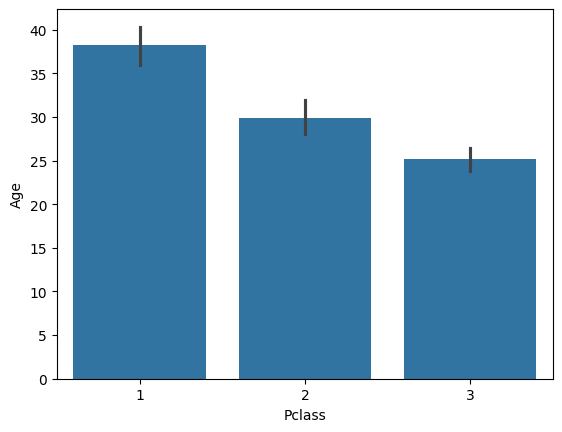

In [42]:
  sns.barplot(x=titanic['Pclass'],y=titanic['Age'])

<Axes: xlabel='Pclass', ylabel='Fare'>

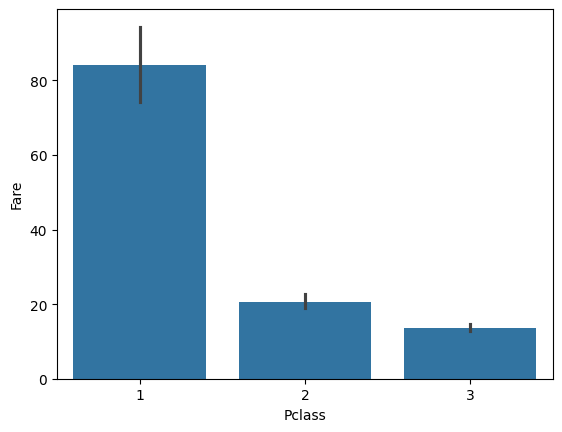

In [43]:
  sns.barplot(x=titanic['Pclass'],y=titanic['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

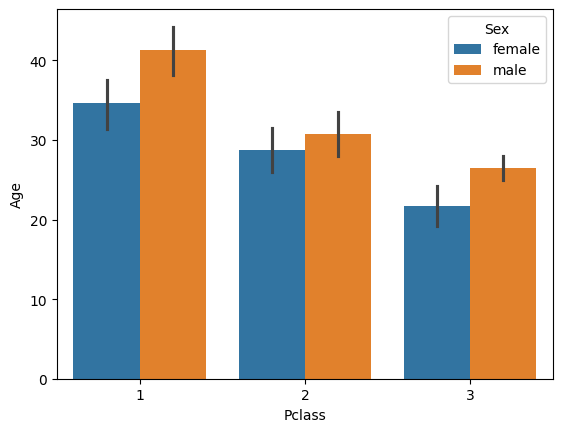

In [44]:
  sns.barplot(x=titanic['Pclass'],y=titanic['Age'],hue=titanic["Sex"])

## 3 Boxplot (Numerical - Categories)

<Axes: xlabel='Sex', ylabel='Age'>

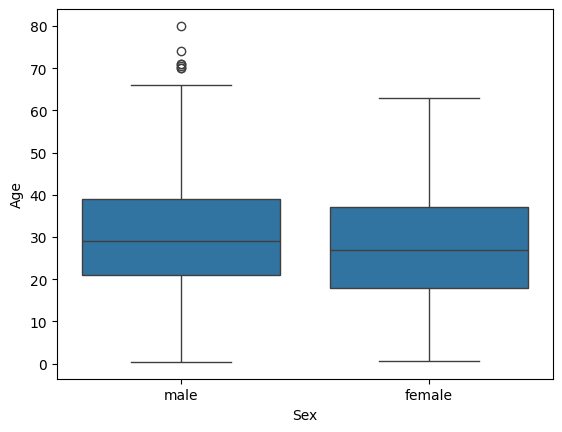

In [46]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

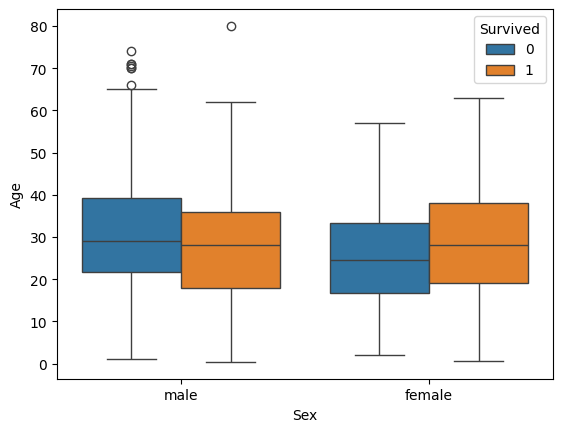

In [47]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'])

## KDEplot (N-C)

<ipython-input-52-3e667bfe495e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['Survived'] == 0]["Age"], label='Not Survived', shade=True)
<ipython-input-52-3e667bfe495e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['Survived'] == 1]["Age"], label='Survived', shade=True)


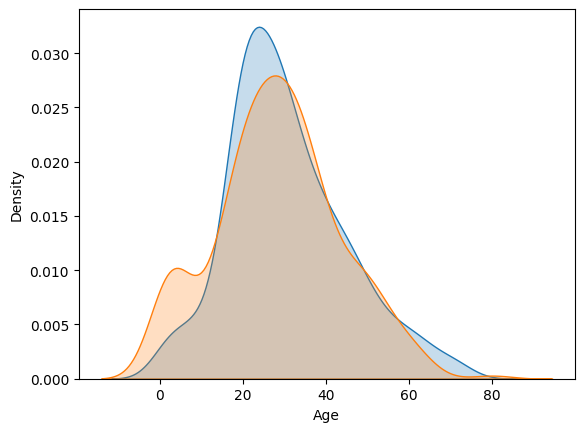

In [52]:
sns.kdeplot(titanic[titanic['Survived'] == 0]["Age"], label='Not Survived', shade=True)
sns.kdeplot(titanic[titanic['Survived'] == 1]["Age"], label='Survived', shade=True)
plt.show()

## Heatmap (C-C)

<Axes: xlabel='Survived', ylabel='Pclass'>

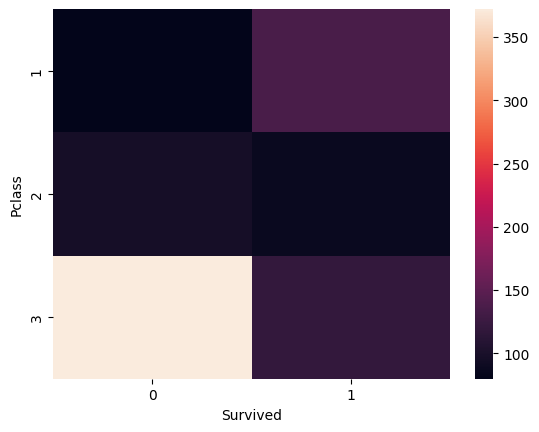

In [54]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

<Axes: xlabel='Pclass'>

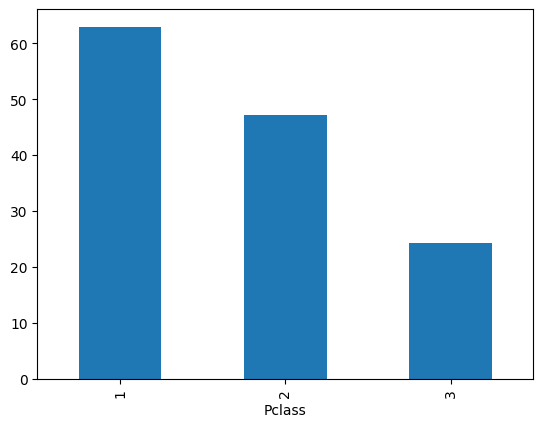

In [61]:
(titanic.groupby('Pclass')['Survived'].mean()* 100).plot(kind="bar")


<Axes: xlabel='Sex'>

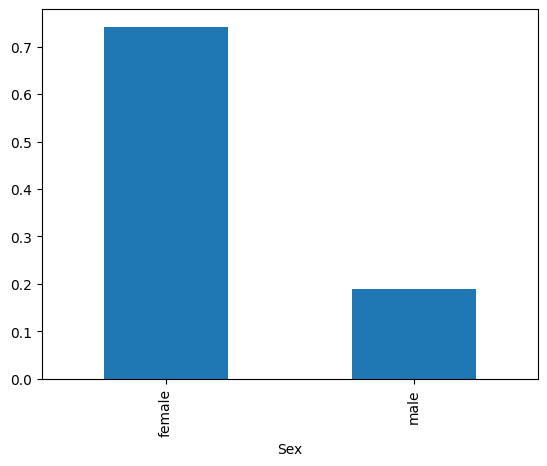

In [64]:
(titanic.groupby('Sex')['Survived'].mean()).plot(kind="bar")


## ClusterMap (C-C)

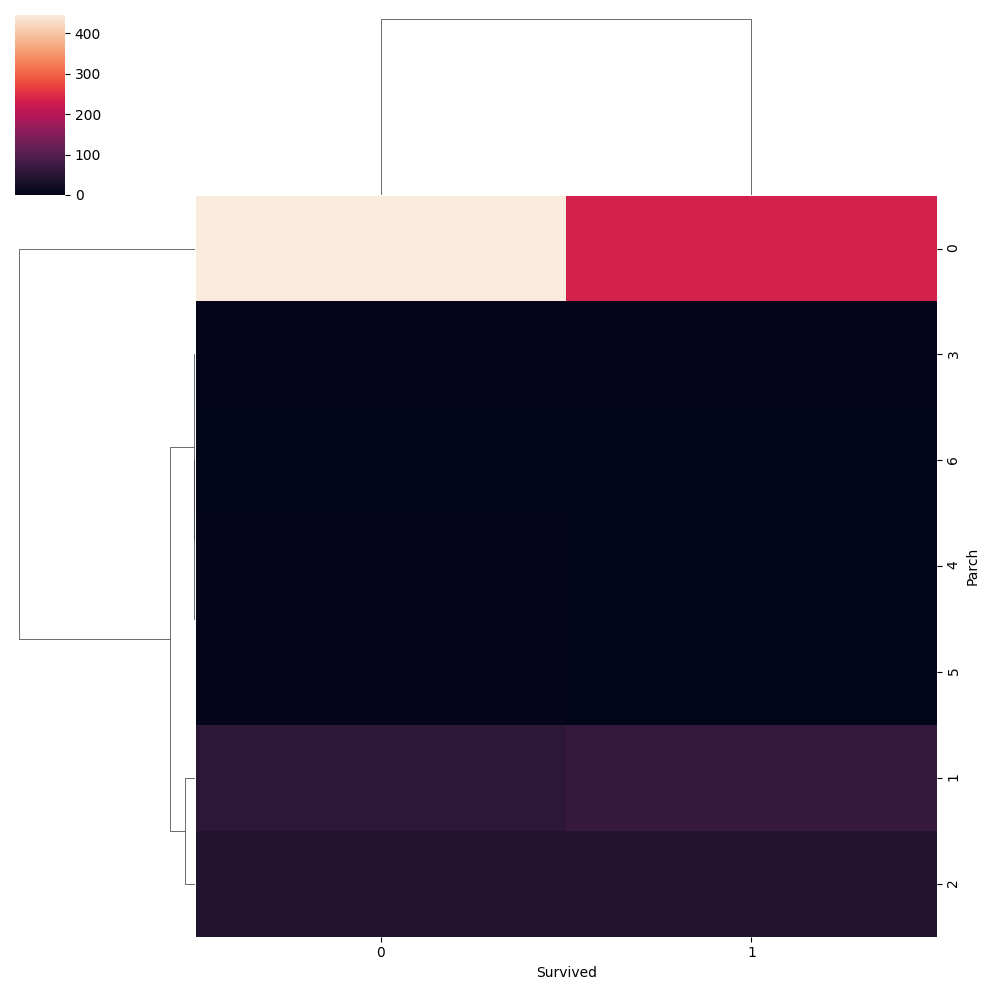

In [68]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

## Pairplot

In [69]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


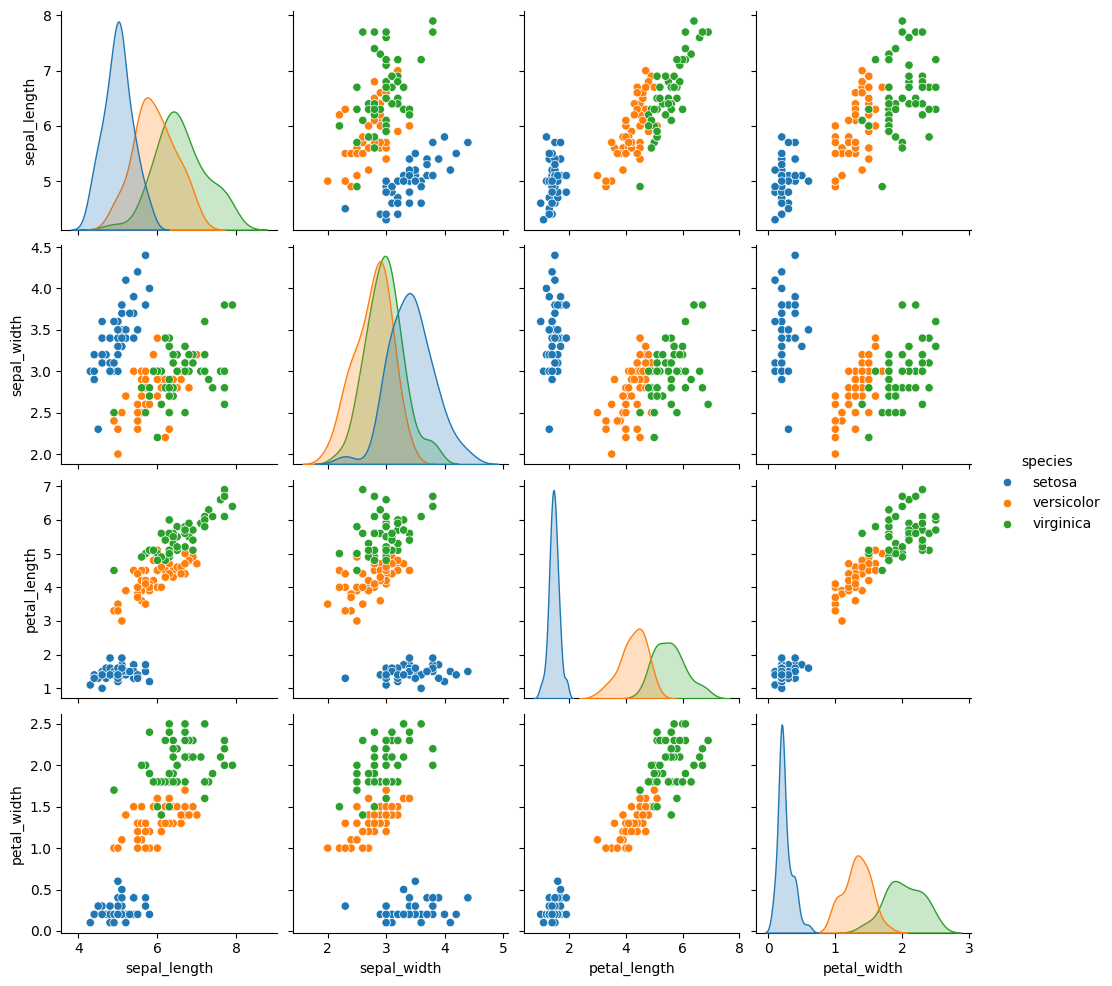

In [71]:
sns.pairplot(iris,hue='species')

## Lineplot

In [72]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [75]:
df = flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

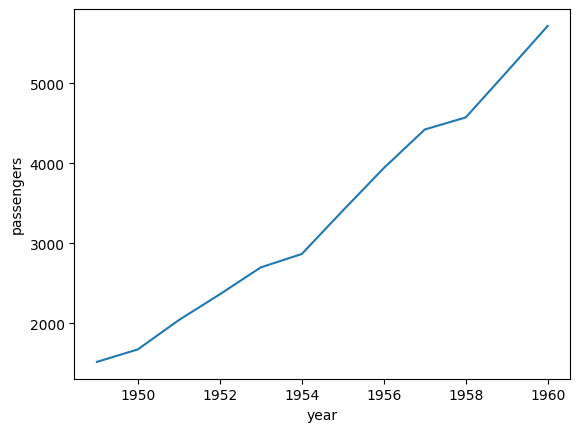

In [76]:
sns.lineplot(x=df['year'],y=df['passengers'])

<Axes: xlabel='year', ylabel='month'>

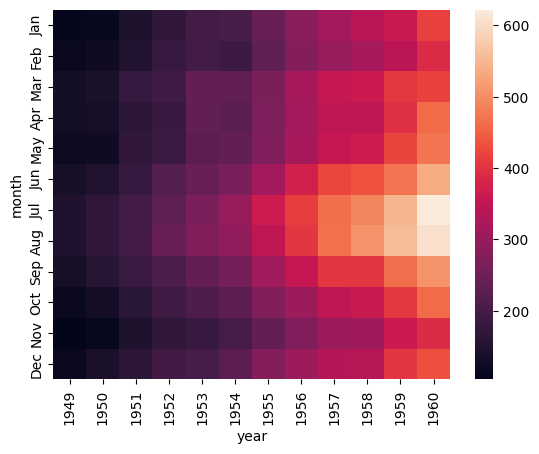

In [79]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

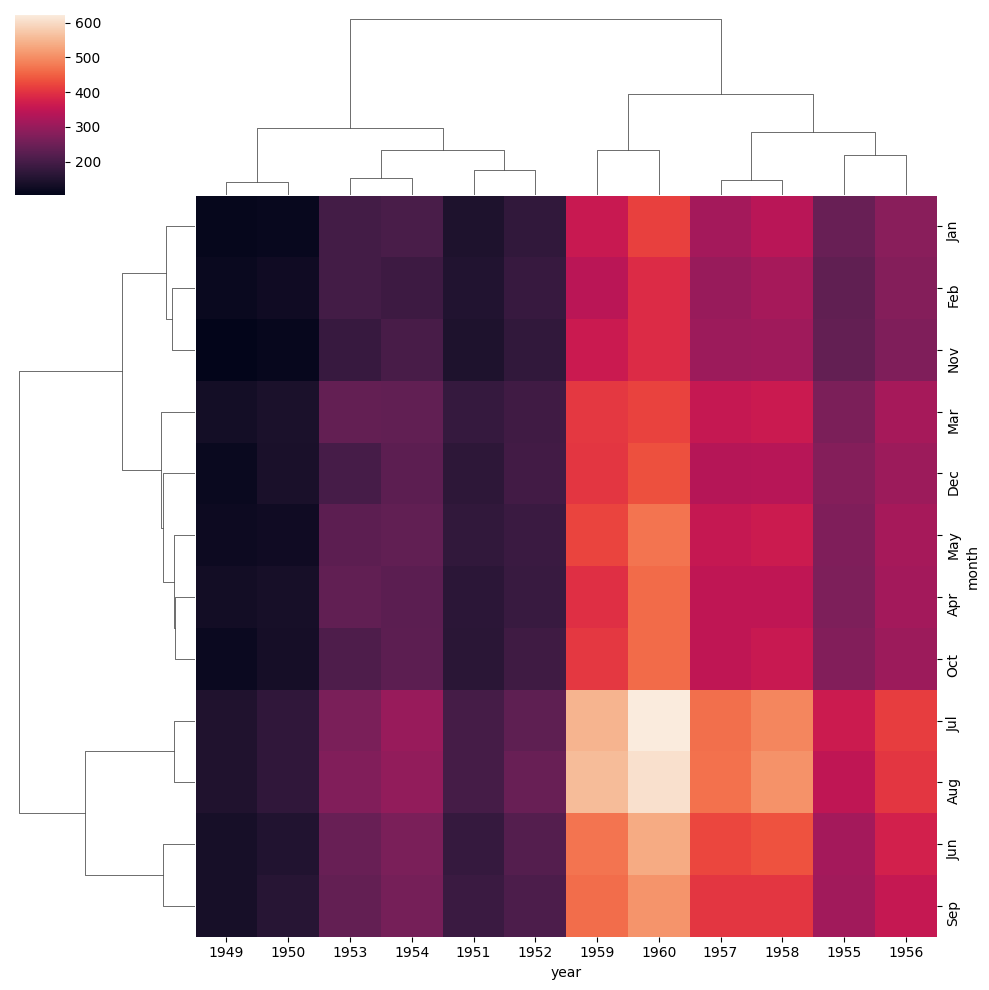

In [80]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))